In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
iris = load_iris()
iris_data = iris.data

iris_label = iris.target

iris_df = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_df['labels'] = iris.target

print(iris_df.head())

X_train,X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=11)

dt_clf.fit(X=X_train, y = y_train)

pred=dt_clf.predict(X_test)



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   labels  
0       0  
1       0  
2       0  
3       0  
4       0  


C:\Users\User\Anaconda3\lib\site-packages\sklearn\datasets\base.py:239: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\datasets\base.py:243: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

In [2]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:  0.9333


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
import numpy as np
iris = load_iris()
print(len(iris.data))
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits=5)
cv_accuracy = []
n_iter = 0
for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, y_pred=pred),4)
    cv_accuracy.append(accuracy)
    
print("\n## 평균 검증 정확도:", np.mean(cv_accuracy))

150

## 평균 검증 정확도: 0.9


C:\Users\User\Anaconda3\lib\site-packages\sklearn\datasets\base.py:239: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\datasets\base.py:243: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

In [15]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
iris = load_iris()
iris_df = pd.DataFrame(iris, columns=iris.feature_names)
iris_df["label"]=iris.target
n_iter=0
skf = StratifiedKFold(n_splits=3)
for train_index, test_index in skf.split(X=iris_df,y=iris_df['label']):
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())


## 교차 검증: 0
학습 레이블 데이터 분포:
 2    33
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    17
Name: label, dtype: int64
## 교차 검증: 0
학습 레이블 데이터 분포:
 2    33
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    17
Name: label, dtype: int64
## 교차 검증: 0
학습 레이블 데이터 분포:
 2    34
1    34
0    34
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    16
1    16
0    16
Name: label, dtype: int64


In [39]:
import pandas as pd

titanic_data = pd.read_csv("./titanic_train.csv")
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
titanic_data["Age"].fillna(titanic_data['Age'].mean(),inplace=True)
titanic_data['Embarked'].fillna('N', inplace=True)
titanic_data['Cabin'].fillna('N', inplace=True)
titanic_data.isnull().sum().sum()

0

In [43]:
titanic_data['Cabin'] = titanic_data['Cabin'].str[:1]
print(titanic_data['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [53]:
titanic_data.groupby(["Survived","Sex"])["Age"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Age, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


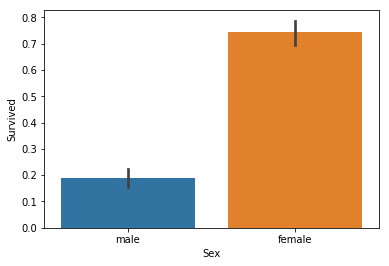

In [56]:
import seaborn as sns
sns.barplot(x='Sex', y='Survived', data=titanic_data)

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


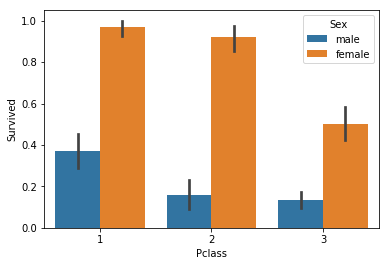

In [59]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data = titanic_data)

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


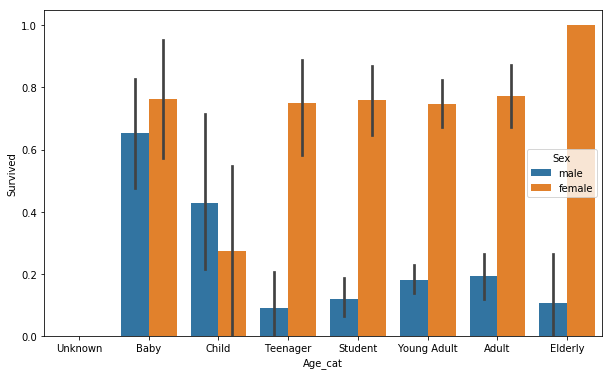

In [67]:
def get_category(age):
    cat=''
    if(age<=-1): cat = 'Unknown'
    elif(age<=5):
        cat="Baby"
    elif(age <=12):
        cat="Child"
    elif(age <=18):
        cat="Teenager"
    elif(age <=25):
        cat="Student"
    elif(age<=35):
        cat="Young Adult"
    elif(age<=60):
        cat="Adult"
    else: cat = 'Elderly'    
    return cat

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_data['Age_cat'] = titanic_data['Age'].apply(lambda x : get_category(x))

sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_data, order= group_names)
titanic_data.drop('Age_cat', axis=1, inplace=True)

In [69]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_data = encode_features(titanic_data)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [70]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [72]:
for i in enumerate([0,1,2,3]):
    print(i)

(0, 0)
(1, 1)
(2, 2)
(3, 3)
